In [ ]:
!pip install streamlit
!pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.1 MB 7.2 MB/s 
     |████████████████████████████████| 164 kB 51.3 MB/s 
     |████████████████████████████████| 235 kB 46.0 MB/s 
     |████████████████████████████████| 181 kB 43.9 MB/s 
     |████████████████████████████████| 4.3 MB 43.3 MB/s 
     |████████████████████████████████| 78 kB 4.8 MB/s 
     |████████████████████████████████| 63 kB 1.0 MB/s 
     |████████████████████████████████| 1.6 MB 45.0 MB/s 
     |████████████████████████████████| 51 kB 5.4 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=30bc066559af5853d4ec750b446998aa38bd4603b1b405215fadb8c603071f3c
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public

In [ ]:
from keras.models import load_model
import streamlit as st

In [ ]:

from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
st.title("Stock Trend Prediction")

In [ ]:
user_input=st.text_input("Enter Strock Ticker","GOOG")

In [ ]:
start="2018-01-01"
end="2022-01-01"
df=yf.download('GOOG',start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
st.subheader('Data from 2018-2020')
st.write(df.describe())

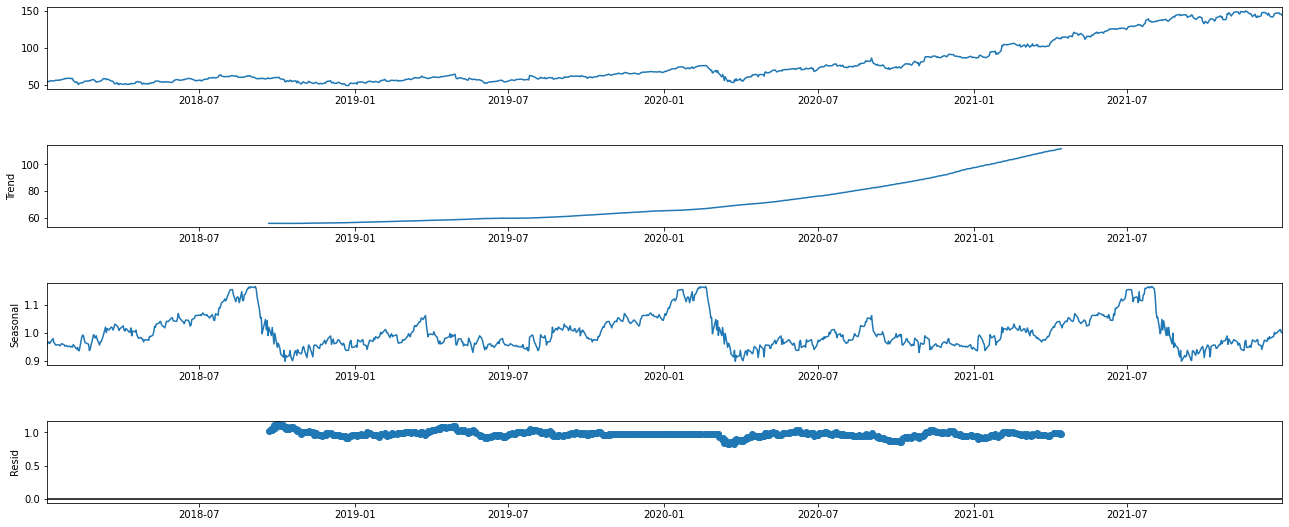

In [ ]:
df_close = df[['Close']]


result = seasonal_decompose(df_close, model='multiplicative', period=365)
fig = result.plot()
fig.set_size_inches(20, 8)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

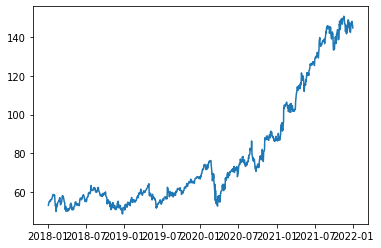

In [ ]:
plt.plot(df_close)

In [ ]:
ma100=df_close.rolling(100).mean()
ma200=df_close.rolling(200).mean()

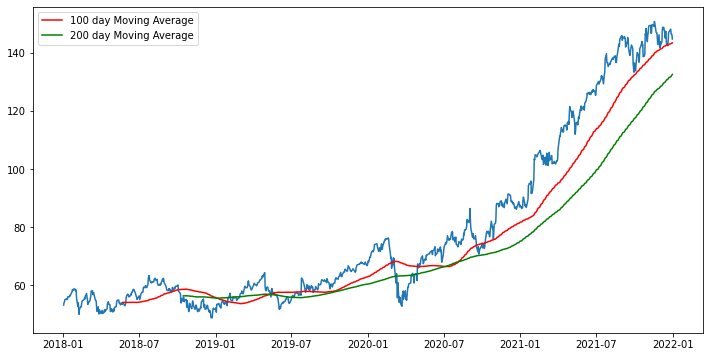

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df_close)
plt.plot(ma100,'red',label="100 day Moving Average")
plt.plot(ma200,'green',label="200 day Moving Average")
plt.legend()

IF 100 MA>200 MA: UPTREND <font color='green'> buy stock.

IF 100 MA<200 MA : DOWNTREND <font color='red'> sell stock

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df_close).reshape(-1,1))
df1.shape

(1008, 1)

In [ ]:
# Splitting data into Training and Testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [ ]:
data_training_array=scaler.fit_transform(data_training)

In [ ]:
x_train=[]
y_train=[]

In [ ]:
for i in range (100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
# ML Model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(1)) # Since our prediction is only one number hence we are adding onlu one unit in dense layer

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train, epochs=20, batch_size=16, verbose=2)
#verbose shows the number of epochs it has completerd

Epoch 1/20
38/38 - 11s - loss: 0.0256 - 11s/epoch - 285ms/step
Epoch 2/20
38/38 - 5s - loss: 0.0090 - 5s/epoch - 133ms/step
Epoch 3/20
38/38 - 5s - loss: 0.0076 - 5s/epoch - 132ms/step
Epoch 4/20
38/38 - 5s - loss: 0.0070 - 5s/epoch - 132ms/step
Epoch 5/20
38/38 - 5s - loss: 0.0061 - 5s/epoch - 134ms/step
Epoch 6/20
38/38 - 5s - loss: 0.0061 - 5s/epoch - 133ms/step
Epoch 7/20
38/38 - 5s - loss: 0.0054 - 5s/epoch - 133ms/step
Epoch 8/20
38/38 - 5s - loss: 0.0052 - 5s/epoch - 131ms/step
Epoch 9/20
38/38 - 5s - loss: 0.0047 - 5s/epoch - 133ms/step
Epoch 10/20
38/38 - 5s - loss: 0.0051 - 5s/epoch - 144ms/step
Epoch 11/20
38/38 - 5s - loss: 0.0051 - 5s/epoch - 132ms/step
Epoch 12/20
38/38 - 6s - loss: 0.0042 - 6s/epoch - 158ms/step
Epoch 13/20
38/38 - 5s - loss: 0.0040 - 5s/epoch - 135ms/step
Epoch 14/20
38/38 - 5s - loss: 0.0053 - 5s/epoch - 133ms/step
Epoch 15/20
38/38 - 8s - loss: 0.0042 - 8s/epoch - 200ms/step
Epoch 16/20
38/38 - 5s - loss: 0.0038 - 5s/epoch - 136ms/step
Epoch 17/20
38/

In [ ]:
model.save('LSTM.h5')

In [ ]:
past_100_days=data_training.tail(100)
final_df= past_100_days.append(data_testing,ignore_index=True)  

In [ ]:
input_data=scaler.fit_transform(final_df)

In [ ]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [ ]:
x_test,y_test=np.array(x_test),np.array(y_test)


In [ ]:
# Making Predictions

y_predicted=model.predict(x_test)

In [ ]:
scaler.scale_

array([0.01208985])

In [ ]:

scale_factor=1/0.01208985

y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

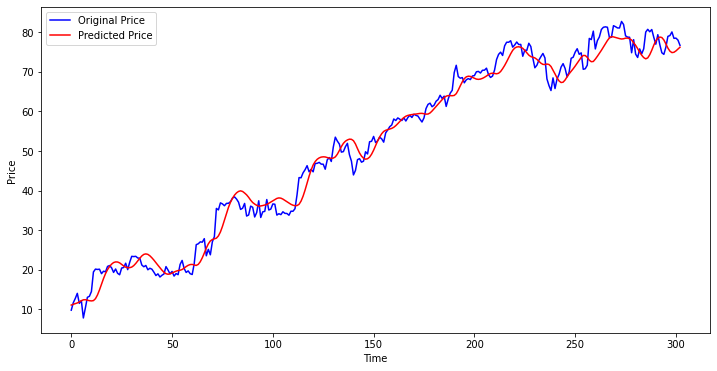

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

In [ ]:
# Model evaluation
mape = np.mean(np.abs(y_test-y_predicted))
mape

25.058552088513753